In [1]:
#!/usr/bin/env python3.6
# -*- coding: utf-8 -*-

In [2]:
# Imports
import sys
import joblib
import numpy as np
from matplotlib import animation
from IPython.display import HTML
from matplotlib import pyplot as plt
import mpl_toolkits.mplot3d.axes3d as p3

In [3]:
#np.random.seed(20)
np.set_printoptions(threshold=sys.maxsize)

In [4]:
%matplotlib inline

In [5]:
%store -r X_relative_footsteps_acc
%store -r Y_relative_footsteps_acc
print(X_relative_footsteps_acc.shape)
print(Y_relative_footsteps_acc.shape)

(9991, 28)
(9991, 8)


# Multivariate Linear Regression (Foot prediction)

In [6]:
import sklearn
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures 
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [7]:
# Entries where RL is supporting
idxs = np.where(X_relative_footsteps_acc[:, 23] == 0)[0]
X_relative_footsteps_acc_RL_support = X_relative_footsteps_acc[idxs]
Y_relative_footsteps_acc_RL_support = Y_relative_footsteps_acc[idxs]

## Predict RL foot -> x

In [8]:
X_relative_footsteps_acc_RL_support[0, :]

array([ 0.        ,  0.        , -0.1       ,  0.03223521, -0.16707049,
        0.01633024, -0.05086472,  0.01613139, -0.08244775,  0.22421836,
        0.2146329 , -0.40479645,  0.23125328, -0.18591964, -0.40580276,
       -0.2571617 ,  0.15356685, -0.40042184, -0.2596469 , -0.13334387,
       -0.40039383,  1.        ,  0.        ,  0.        ,  1.        ,
        0.        ,  0.        ,  0.        ])

In [9]:
Y_relative_footsteps_acc_RL_support[0, :]

array([ 0.22407743,  0.18885393,  0.23964177, -0.19926585, -0.26746292,
        0.12131841, -0.25399354, -0.15574807])

### Linear Regression

In [120]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_support[:, 4]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_x = LinearRegression()

# Fit the model
model_rl_relative_support_x.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_x.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.786237696247444
RMSE:  0.012366901083655749
The lowest error is:  3.0971288298653477e-05
The highest error is:  0.06878150590160098
The avg. error is:  0.008428602436535313


In [121]:
model_rl_relative_support_x.coef_

array([[ 0.02002966, -0.09324606,  0.11996399, -0.06139114, -0.00280576,
         0.06880636, -0.38722816,  0.09341646, -0.22300685,  0.74894707,
         0.12816071,  0.1159985 ,  0.33208778,  0.10041595]])

In [122]:
model_rl_relative_support_x.intercept_

array([0.11470788])

Text(0, 0.5, 'Predictions')

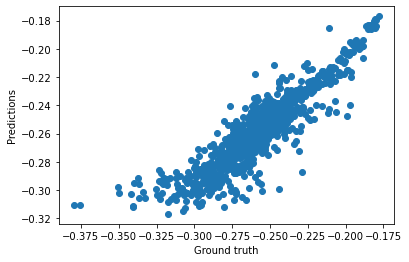

In [123]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [124]:
#%store model_rl_relative_support_x

In [125]:
#for idx, prediction in enumerate(predictions):
#    print(f'Start: {X_test[idx, 6]}. Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [126]:
# Save model
#joblib.dump(model_rl_relative_support_x, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_x.sav")

### Predict FL foot -> y

In [143]:
# Input
X = np.hstack((X_relative_footsteps_acc_RL_support[:, :3], # prev velocity command
               X_relative_footsteps_acc_RL_support[:, -3:], # commanded velocity command
               X_relative_footsteps_acc_RL_support[:, 9:11], # FL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 12:14], # FR (x,y) position
               X_relative_footsteps_acc_RL_support[:, 15:17], # RL (x,y) position
               X_relative_footsteps_acc_RL_support[:, 18:20])) # RR (x,y) position

# Target
Y = np.array([Y_relative_footsteps_acc_RL_support[:, 5]]).T

assert Y.shape[0] == X.shape[0]

# Split data into train and test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, shuffle=True)

# Create the model
model_rl_relative_support_y = LinearRegression()

# Fit the model
model_rl_relative_support_y.fit(X_train, Y_train)

# Predict
predictions = model_rl_relative_support_y.predict(X_test)

# Stats
print('R2: ', r2_score(predictions, Y_test))
print('RMSE: ', np.sqrt(mean_squared_error(Y_test, predictions)))
print("The lowest error is: ", np.min(np.abs(predictions - Y_test)))
print("The highest error is: ", np.max(np.abs(predictions - Y_test)))
print("The avg. error is: ", np.mean(np.abs(predictions - Y_test)))
#print("Seq of errors (descendant): \n", sorted(np.abs(predictions - Y_test).tolist(), reverse=True))

R2:  0.9217123344505442
RMSE:  0.010770906517110846
The lowest error is:  1.5319730012064436e-05
The highest error is:  0.07129513689751399
The avg. error is:  0.006928823374589493


In [144]:
model_rl_relative_support_y.coef_

array([[-0.00459903, -0.14690234,  0.05629508,  0.01335583, -0.05174463,
        -0.02012723, -0.11997766, -0.45331667,  0.16445858, -0.2877582 ,
        -0.3045838 ,  1.45304342,  0.0443908 , -0.01489819]])

In [145]:
model_rl_relative_support_y.intercept_

array([-0.1271132])

Text(0, 0.5, 'Predictions')

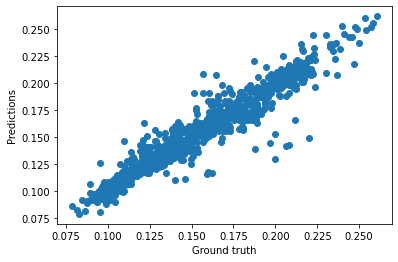

In [146]:
## The line / model
plt.scatter(Y_test, predictions)
plt.xlabel("Ground truth")
plt.ylabel("Predictions")

In [147]:
#%store model_rl_relative_support_y

In [148]:
#for idx, prediction in enumerate(predictions):
#    print(f'Groundtruth: {Y_test[idx]}. Predicted: {prediction}')

In [32]:
# Save model
#joblib.dump(model_rl_relative_support_y, "/home/itaouil/workspace/aliengo_ws/src/aliengo_navigation/models/protocol3/relative/model_rl_relative_support_y.sav")